<a href="https://colab.research.google.com/github/hkyoo52/CV/blob/main/%EB%8B%A4%EC%96%91%ED%95%9C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polar Plot
* 극 좌표계를 이용하는 시각
* 회전, 주기성 표현 적합
* projection = polar 추가하여 사용
* Scatter, Line, Bar 모두 가능



In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

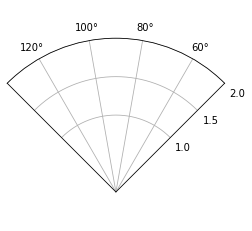

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)   # 극좌표계 생성

ax.set_rmax(2)      # 반지름 최대값 결정
# ax.set_rmin(1)
ax.set_rticks([1, 1.5, 2])    # 반지름 label 정해주기
ax.set_rlabel_position(-90)   # 반지름 label 위치 정해주기

ax.set_thetamin(45)           # 그릴 각도 정하기
ax.set_thetamax(135)

plt.show()

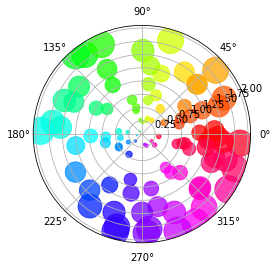

In [ ]:
np.random.seed(19680801)

N = 100
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)    # 각도에 따라 색 지정
plt.show()

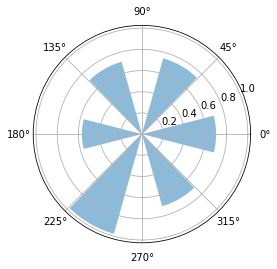

In [ ]:
np.random.seed(19680801)

N = 6
r = np.random.rand(N)
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.bar(theta, r, width=0.5, alpha=0.5)
plt.show()

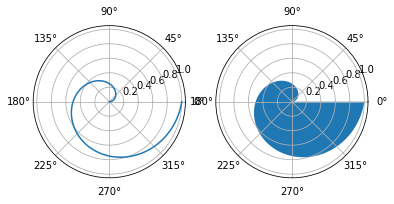

In [ ]:
np.random.seed(19680801)

N = 1000
r = np.linspace(0, 1, N)
theta = np.linspace(0, 2*np.pi, N)

fig = plt.figure()

# 선 그래프
ax1 = fig.add_subplot(121, projection='polar')
ax1.plot(theta, r)

# 선 그래프를 채움
ax2 = fig.add_subplot(122, projection='polar')
ax2.fill(theta, r)

plt.show()

## Radar Chart
* 별모양으로 생겨 Star Plot으로 불림
* 중심점 기준 N개의 변수로 표현

![image](https://user-images.githubusercontent.com/63588046/153162852-61696f31-d98b-4811-bd5c-9bae8ea4ff1c.png)

### 주의점
* 각 feature는 독립적이며 척도가 같아야한다(순서형과 수치형 같이 있으면 고려)
* feature 순서가 중요 (면적은 중요하지 않음) (아래는 동일한 데이터)

![image](https://user-images.githubusercontent.com/63588046/153163101-a0731392-9a42-4037-a260-7e55be299b13.png)

* feature가 많으면 가독성 bad


In [ ]:
pokemon = pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]    # 6개 변수 사용
theta = np.linspace(0, 2*np.pi, 6, endpoint=False)                    # 각도를 6등분

values = pokemon.iloc[0][stats].to_list()     # 내가 볼 포켓몬 (이상해씨)

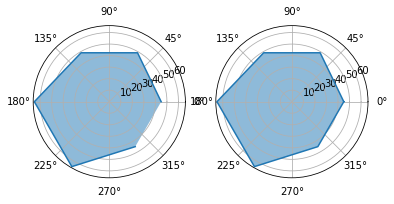

In [ ]:
fig = plt.figure()

# 첫값과 마지막 값을 선으로 연결 안함....
ax1 = fig.add_subplot(121, projection='polar')
ax1.plot(theta, values)
ax1.fill(theta, values, alpha=0.5)

# value와 theta에 첫값 추가
ax2 = fig.add_subplot(122, projection='polar')
values.append(values[0])
theta = theta.tolist() + [theta[0]]
ax2.plot(theta, values)
ax2.fill(theta, values, alpha=0.5)

plt.show()

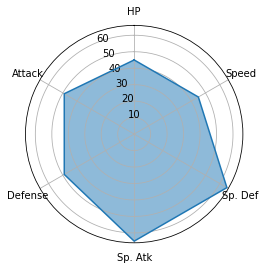

In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='polar')

values = pokemon.iloc[0][stats].to_list()
values.append(values[0])

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.5)

ax.set_thetagrids([n*60 for n in range(6)], stats)      # 그래프 각도 변경
ax.set_theta_offset(np.pi/2)

plt.show()

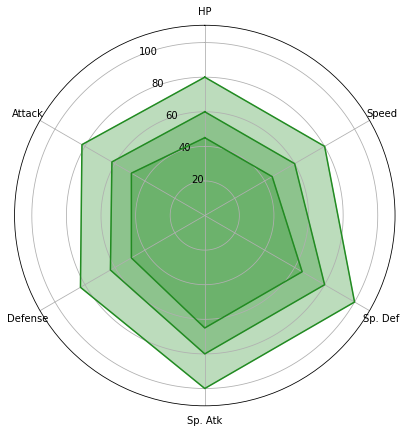

In [ ]:
# 데이터 겹처서 그리기

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, projection='polar')

for idx in range(3):

    values = pokemon.iloc[idx][stats].to_list()
    values.append(values[0])

    ax.plot(theta, values, color='forestgreen')
    ax.fill(theta, values, color='forestgreen', alpha=0.3)
    
ax.set_rmax(110)
ax.set_thetagrids([n*60 for n in range(6)], stats)
ax.set_theta_offset(np.pi/2)
    
plt.show()

# Pie Chart

* 원을 부채꼴로 분할하여 표현
* 연구때 지양...(비교 어려움(bar가 가독성 더 좋음))

In [ ]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

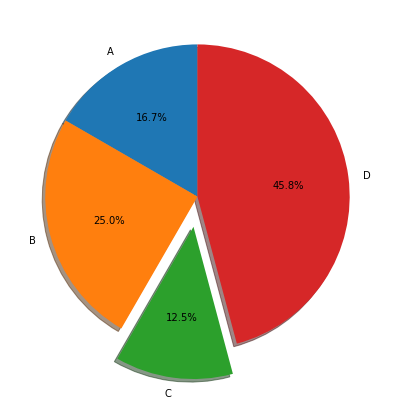

In [ ]:
labels = ['A', 'B', 'C', 'D']
data = np.array([60, 90, 45, 165]) # total 360
explode = [0, 0, 0.2, 0]

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(data,labels=labels,
       startangle=90,           # 시작하는 각도
       explode=explode,         # 띄어낼 부분과 그 양 (강조)
       shadow=True,             # 그림자 -> 주의를 줌 but 가독성 bad
      autopct='%1.1f%%',        # 수치를 넣음
      counterclock=False,       # 그리는 순서 지정
       )
plt.show()

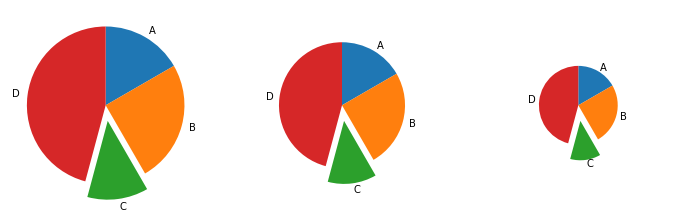

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 7))
explode = [0, 0, 0.2, 0]

for size, ax in zip([1, 0.8, 0.5], axes):
    ax.pie(data, labels=labels, explode=explode, startangle=90, counterclock=False,
           radius=size
          )
plt.show()

## Donut Chart
* 중간이 비어있음
* 디자인적으로 굿
* 인포그래픽에서 종종 사용

![image](https://user-images.githubusercontent.com/63588046/153167297-fccfdf06-d2cf-41d1-8d4e-bd485724b322.png)

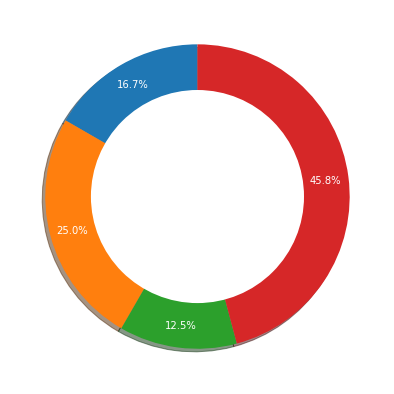

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.pie(data, labels=labels, startangle=90,
      shadow=True, autopct='%1.1f%%', pctdistance=0.85, textprops={'color':"w"})

# 좌표 0, 0, r=0.7, facecolor='white'
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.show()

## Sunburst Chart
* 계층적 데이터 시각화 굿
* 기독성 떨어짐 => 이것보다는...Treemap 추천

![image](https://user-images.githubusercontent.com/63588046/153167570-ef7e07c2-13be-4bd9-b2ba-18c8055a5f5e.png)

# Missingno
* 결측치를 체크하는 시각화 라이브러리
* pip install missingno

In [ ]:
!pip install --upgrade pip
!pip install missingno squarify pywaffle matplotlib_venn

     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.9/565.9 KB 10.7 MB/s eta 0:00:00


In [ ]:
import missingno as msno
import squarify
import pywaffle
import matplotlib_venn

print('missingno ver', msno.__version__)
# print('squarify ver', squarify.__version__)
# print('pywaffle ver', pywaffle.__version__)
print('matplotlib_venn ver', matplotlib_venn.__version__)

missingno ver 0.5.0
matplotlib_venn ver 0.11.6


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


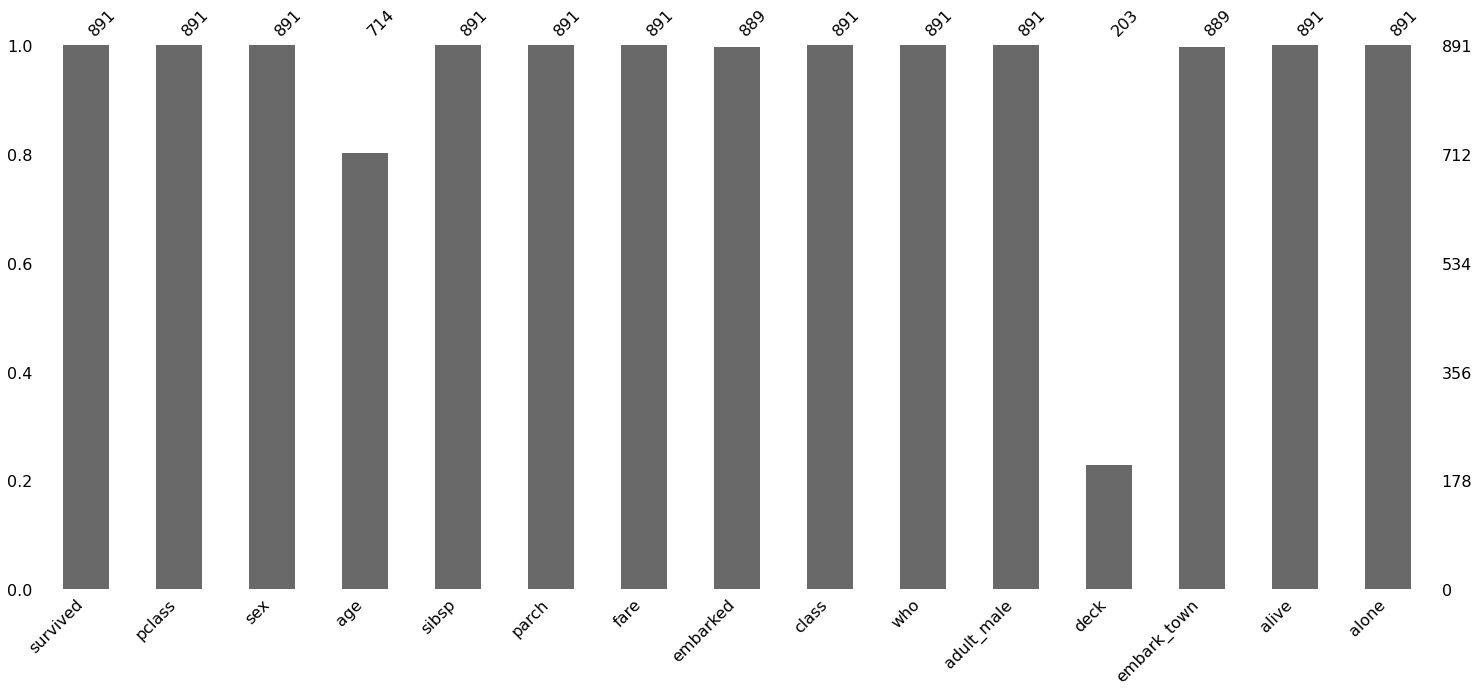

In [ ]:
import missingno as msno

msno.bar(titanic)

# Treemap
* 계층적 데이터를 직사각형으로 시각화하는 방법
* 모자이크 플롯과 유사
=> zoom in, zoom out을 더 추천함(클릭하면 들어가고 나가는 것)

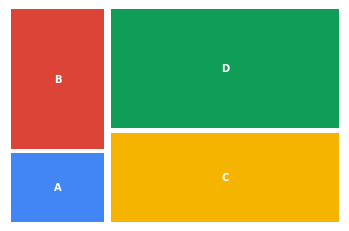

In [ ]:
import squarify

fig, ax = plt.subplots()
values = [100, 200, 300, 400]
label = list('ABCD')
color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

squarify.plot(values, label=label, color=color, pad=0.2,                # pad : 한칸씩 띄기
               text_kwargs={'color':'white', 'weight':'bold'}, ax=ax)   # text_kwarg : 글자 형식

ax.axis('off')
plt.show()

# Waffle Chart
* 와플형태로 discrete하게 값을 나타냄
* pip install pywaffle

* icon 사용도 가능

In [ ]:
from pywaffle import Waffle

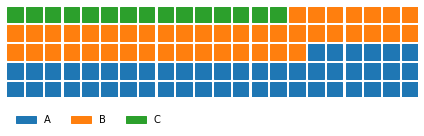

In [ ]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    cmap_name='tab10',      # cmap으로 표현
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}, # legned, 위치 지정
    starting_location='SE', # NW, SW, NE and SE 시작하는 지점
    vertical=True            # 방향 지정
)

plt.show()

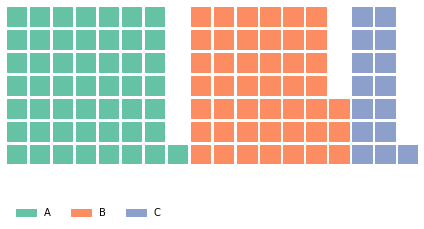

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    block_arranging_style= 'new-line',      # 끊어서 보여줌
)

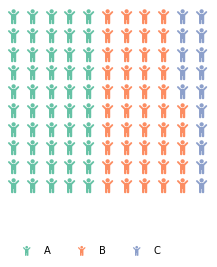

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,     
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    icons='child',            # 아이콘으로 보여줌
    icon_legend=True,         # legend도 아이콘으로 보여줌
    font_size=15,
)
plt.show()

# Venn(벤다이어그램)
* set 기반
* 4개 이상일 경우 bad

* pip install pyvenn
* pip install matplotlib-venn

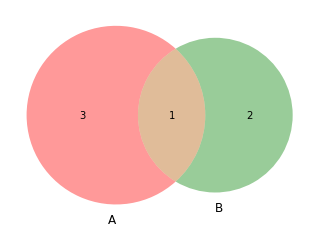

In [ ]:
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))      # A만 포함, B만 포함, 둘다 포함

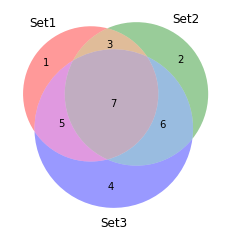

In [ ]:
from matplotlib_venn import venn3
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('Set1', 'Set2', 'Set3'))

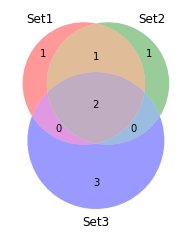

In [ ]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()